In [1]:
import numpy as np, numpy.random as nr
import pandas as pd
import matplotlib.pyplot as plt

Полезная статья:
https://dyakonov.org/2018/03/12/логистическая-функция-ошибки/

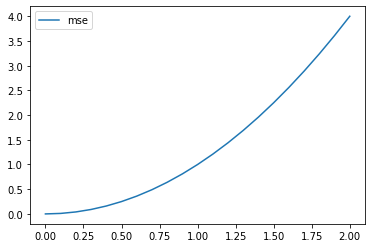

In [2]:
x = np.linspace(0, 2, 21)
x2 = x ** 2
plt.plot(x, x2, label='mse')
_ = plt.legend()

# Softmax

Используется для перевода значений в распределение вероятностей

$$ softmax(z)_i = \frac {e^{z_i}} {\sum_{j=0}^{J} {e^{z_j}}} $$

Свойства:

$$ \sum_i {softmax(z)_i} = 1$$

$$ \forall c: softmax(z + c) = softmax(z)  $$

In [4]:
values = nr.rand(10)
exps = np.exp(values)
probs = exps / np.sum(exps)
probs
sum(probs)

1.0

# Перекрестная энтропия

$ \hat y = f(x) \in [0, 1]$ -- ответ алгоритма, представляющий распределение вероятности

$$ p(y_i | x_i, f) = {\hat y}_i^{y_i} (1-{\hat y}_i)^{1 - y_i} $$

Для бинарной классификации $y_i \in \{0, 1\}$:

$$ p(y_i=1 | x_i, f) = {\hat y}_i $$

$$ p(y_i=0 | x_i, f) = 1-{\hat y}_i $$

Из независимости распределений:
$$ p(y | X, f) = \prod_i p(y_i | x_i, f) $$

При логарифмировании произведение становится суммой, а возведение в степень - произведением:

$$ \log p(y | X, f) = \sum_i \log p(y_i | x_i, f)$$

$$ \log p(y_i | x_i, f) = y_i \log {\hat y}_i + (1-y_i) \log (1-{\hat y}_i)$$

Перекрестная энтропия:

$$ CE(y, \hat y) = - \sum_i y_i \log {\hat y}_i + (1-y_i) \log (1-{\hat y}_i) \to \min $$

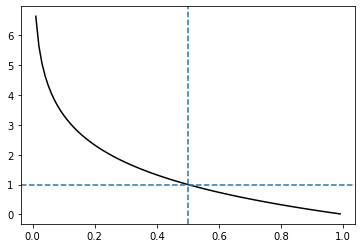

In [34]:
# y = 1
y_hat = np.linspace(0, 1, 101)[1:-1]
c = -np.log2(y_hat)
plt.plot(y_hat, c, 'k')
plt.axvline(2**-1, linestyle='--')
_ = plt.axhline(1, linestyle='--')

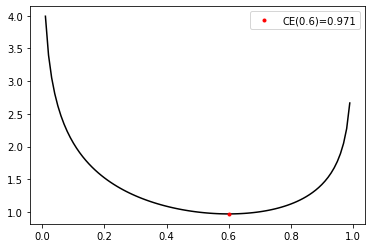

In [65]:
# Наилучший константный ответ:
n0, n1 = 4, 6
ce = -(n1 * np.log2(y_hat) + n0 * np.log2(1 - y_hat)) / (n0 + n1)
plt.plot(y_hat, ce, 'k')

idx = np.argmin(ce)
plt.plot(y_hat[idx], ce[idx], 'r.', label=f'CE({y_hat[idx]})={ce[idx]:.3f}')
_ = plt.legend()

# Расстояние Кульбака-Лейблера
$p, q$ - два распределения над одним и тем же вероятностным пространством 

### Перекрестная энтропия:
$ H(p, q) = E_p[-\log q] = H(p) + D_{KL}(p||q)$

- $H(p)$ -- энтропия $p$
- $D_{KL}(p||q)$ -- расстояние Кульбака-Лейблера (также: относительная энтропия, дивергенция К.-Л., etc)